# Random Incidence in the Poisson Process

In this demonstration, we will illustrate why an observer is likely to fall within a larger interval in a Poisson process.

Consider a Poisson process with a rate of $\lambda$ arrivals per unit time.

Let $T$ represent the length of the interval during which an observer falls. It can be shown that:

$$T \sim \text{Erlang}(2, \lambda)$$

In other words, $T$ follows an Erlang distribution with shape parameter 2 and rate parameter $\lambda$. This means that $T$ is the sum of two independent exponential random variables:

$$T = X_1 + X_2 \sim \text{Erlang}(2, \lambda)$$

Where $X_1$ and $X_2$ are both exponentially distributed with a rate parameter of $\lambda$:

$$X_1, X_2 \sim \text{Exponential}(\lambda)$$

This result arises from the memorylessness property of an Exponential random variable.

Understanding this concept has important implications for analyzing random incidences within the Poisson process.

For further information and details, you can refer to the [MIT OpenCourseWare page](https://ocw.mit.edu/courses/res-6-012-introduction-to-probability-spring-2018/resources/random-incidence-in-the-poisson-process/).


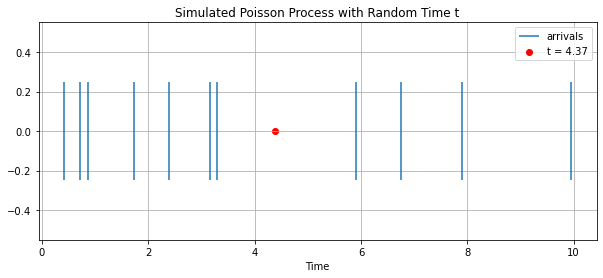

Length of the interval where t = 4.37 is 2.61


In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
lambda_rate = 1  # Rate of the Poisson process
total_time = 10  # Total time interval for simulation (e.g., 10 time units)

# Simulate events from a Poisson process
num_events = np.random.poisson(lambda_rate * total_time)
event_times = np.sort(np.random.uniform(0, total_time, num_events))

# Choose a random time 't'
t = np.random.uniform(0, total_time/2)

# Find the index of the interval where 't' falls
interval_idx = np.searchsorted(event_times, t)

# Compute the length of the interval where 't' is
if interval_idx == 0:
    interval_length = event_times[0]
else:
    interval_length = event_times[interval_idx] - event_times[interval_idx - 1]

# Create a figure
fig, ax = plt.subplots(figsize=(10, 4))

# Plot the event times
ax.eventplot(event_times, lineoffsets=0, linelengths=0.5, label='arrivals')
ax.scatter(t, 0, color='red', marker='o', label=f"t = {t:.2f}")

ax.set_xlabel('Time')
ax.set_title('Simulated Poisson Process with Random Time t')
ax.legend(loc='upper right')
ax.grid(True)

# Display the plot
plt.show()

# Print the length of the interval where 't' is
print(f"Length of the interval where t = {t:.2f} is {interval_length:.2f}")


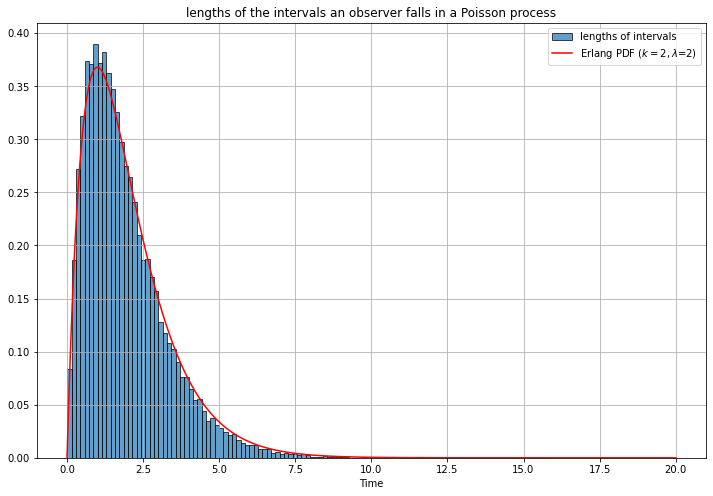

Mean of the lengths of the intervals is 1.91


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gamma

# Parameters
lambda_rate = 1  # Rate of the Poisson process
total_time = 20  # Total time interval for simulation (e.g., 10 time units)

interval_lengths = []

for _ in range(30000):
    # Simulate events from a Poisson process
    num_events = np.random.poisson(lambda_rate * total_time)
    event_times = np.sort(np.random.uniform(0, total_time, num_events))

    # Choose a random time 't'
    t = np.random.uniform(0, total_time/2)

    # Find the index of the interval where 't' falls
    interval_idx = np.searchsorted(event_times, t)

    # Compute the length of the interval where 't' is
    if interval_idx == 0:
        interval_length = event_times[0]
    elif interval_idx >= len(event_times):
        interval_length = total_time - event_times[-1]
    else:
        interval_length = event_times[interval_idx] - event_times[interval_idx - 1]
    
    interval_lengths.append(interval_length)

# Create a figure
fig, ax = plt.subplots(figsize=(12, 8))

# Plot the event times
ax.hist(interval_lengths, bins=80, edgecolor='black', alpha=0.7, density=True, label='lengths of intervals')

# Generate data points for the Erlang distribution
k = 2
x = np.linspace(0, total_time, 1000) 
pdf_erlang = gamma.pdf(x, a=k, scale=1/lambda_rate)

# Plot the PDF of Erlang(2, 2)
ax.plot(x, pdf_erlang, color='red', label='Erlang PDF ($k=2,\lambda$=2)')

ax.set_xlabel('Time')
ax.set_title('lengths of the intervals an observer falls in a Poisson process')
ax.legend(loc='upper right')
ax.grid(True)

# Display the plot
plt.show()

# Print the Mean of the lengths of the intervals
print(f"Mean of the lengths of the intervals is {np.mean(interval_lengths):.2f}")
